In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


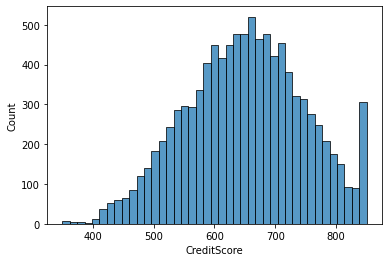

In [9]:
# Visualization
sns.histplot(df['CreditScore'])

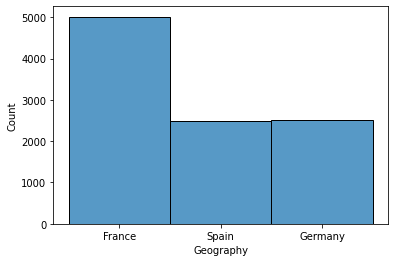

In [10]:
sns.histplot(df['Geography'])

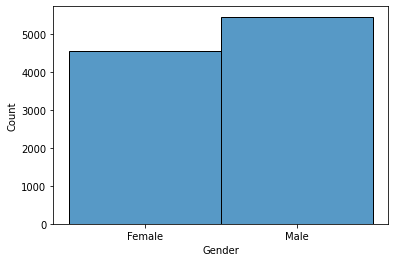

In [11]:
sns.histplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


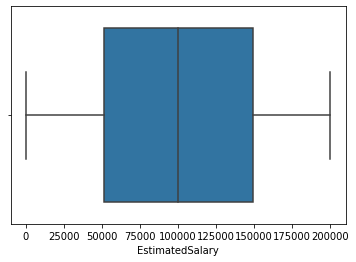

In [12]:
sns.boxplot(df['EstimatedSalary'])

In [5]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
#handling missing values
df.dropna(axis=0, how='all', inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


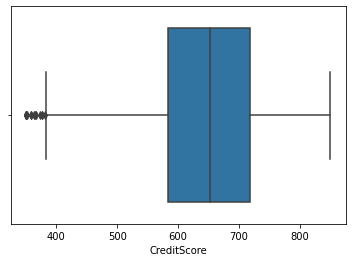

In [16]:
# removing outliers
sns.boxplot(df['CreditScore'])

In [17]:
l = np.where(df['CreditScore']<400)

In [23]:
print("old shape:" , df.shape)
df.drop(l[0], inplace=True)
print("new shape:" , df.shape)

old shape: (9981, 14)


KeyError: ignored

In [25]:
df = df.drop(['Surname'], axis=1)

In [26]:
df

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [27]:
# encoding
categorical_feature_mask = df.dtypes==object
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [28]:
categorical_cols

['Geography', 'Gender']

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

In [31]:
df[categorical_cols].head(10)

,Geography,Gender
0,0,0
1,2,0
2,0,0
3,0,0
4,2,0
5,2,1
6,0,1
8,0,1
9,0,1
10,0,1


In [32]:
# splitting into train, test
len = len(df.columns)

In [33]:
X = df.iloc[:, 3:-1]

In [34]:
X

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,42,2,0.00,1,1,1,101348.88
1,2,0,41,1,83807.86,1,0,1,112542.58
2,0,0,42,8,159660.80,3,1,0,113931.57
3,0,0,39,1,0.00,2,0,0,93826.63
4,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...
9995,0,1,39,5,0.00,2,1,0,96270.64
9996,0,1,35,10,57369.61,1,1,1,101699.77
9997,0,0,36,7,0.00,1,0,1,42085.58
9998,1,1,42,3,75075.31,2,1,0,92888.52


In [35]:
y = df['Exited']

In [36]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9981, dtype: int64

In [40]:
# scaling
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(X.to_numpy())

In [41]:
df_scaled = pd.DataFrame(df_scaled)

In [42]:
df_scaled

,0,1,2,3,4,5,6,7,8
0,-0.901295,-1.096512,0.294389,-1.042639,-1.225277,-0.913081,0.646496,0.969506,0.022800
1,1.515963,-1.096512,0.199036,-1.388499,0.117823,-0.913081,-1.546800,0.969506,0.217412
2,-0.901295,-1.096512,0.294389,1.032521,1.333437,2.529860,0.646496,-1.031453,0.241560
3,-0.901295,-1.096512,0.008331,-1.388499,-1.225277,0.808389,-1.546800,-1.031453,-0.107980
4,1.515963,-1.096512,0.389742,-1.042639,0.786152,-0.913081,0.646496,0.969506,-0.364291
...,...,...,...,...,...,...,...,...,...
9976,-0.901295,0.911983,0.008331,-0.005059,-1.225277,0.808389,0.646496,-1.031453,-0.065489
9977,-0.901295,0.911983,-0.373081,1.724240,-0.305875,-0.913081,0.646496,0.969506,0.028901
9978,-0.901295,-1.096512,-0.277728,0.686661,-1.225277,-0.913081,-1.546800,0.969506,-1.007539
9979,0.307334,0.911983,0.294389,-0.696779,-0.022125,0.808389,0.646496,-1.031453,-0.124290


In [43]:
# split dataset into train, test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=0)

In [44]:
X_train

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6349,0,0,25,7,0.00,2,0,1,82393.08
1483,0,1,36,1,104077.19,2,0,1,68594.00
7756,2,0,36,7,116338.68,1,1,1,155743.48
8699,1,1,32,2,117070.21,1,1,0,113482.20
2617,1,1,45,6,152296.83,4,0,1,108040.86
...,...,...,...,...,...,...,...,...,...
9242,1,1,32,9,106520.73,2,1,0,177092.16
4869,0,1,50,4,149713.61,3,1,1,124872.42
3274,0,0,31,6,0.00,1,1,1,16447.60
9864,1,1,33,1,137937.95,1,1,1,51387.10


In [45]:
y_train

6349    0
1483    0
7756    0
8699    0
2617    1
       ..
9242    0
4869    1
3274    1
9864    0
2742    0
Name: Exited, Length: 9481, dtype: int64